# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Background

The training dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge.

Each individual is classified into four mutually exclusive categories:

No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
Mm_only: Individuals who use mobile money only
Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Instructions

**1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?**

In [20]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [21]:
# Getting the data
data = pd.read_csv("Data/training.csv")

# Minimum info about the data
rows, columns = data.shape
print("Total columns:\t{}\nTotal rows:\t{}".format(columns, rows))

# A view of the first two rows
data.head(2)

Total columns:	37
Total rows:	7094


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3


In [22]:
# Missing data
print("Number of columns with missing values: {}".format(len(data.columns[data.isnull().any()])))

Number of columns with missing values: 0


**2. Get basic descriptive statistics for the dataset.**

**Cleaning the Data**

In [23]:
# Renaming Columns 
columns_names = {"Q1":"Age", "Q2": "Gender", "Q3":"Marital status",
                 "Q4":"Education", "Q5":"Residents", "Q6": "Land ownership",
                 "Q7": "Mobile Phone Ownership", "Q8_1": "Salaries or Wages",
                 "Q8_2": "Trading", "Q8_3": "Servives", "Q8_4": "Piece work",
                 "Q8_5": "Rental Income", "Q8_6": "Interest", "Q8_7": "Pension",
                 "Q8_8": "Welfare", "Q8_9": "Rely on someone", "Q8_10": "Dependent",
                 "Q8_11": "Other", "Q9": "Employeer", "Q10": "Trading Goods", 
                 "Q11": "Type of Service", "Q12":"Sent Money", "Q13": "Seny Money Days",
                 "Q14": "Received Money", "Q15": "Received Money Days", "Q16":"Mobile Money Usage",
                 "Q17":"Mobile Money Paying Services" ,"Q18": "Literacy in Kiswhahili", "Q19": "Literacy in English"}

data = data.rename(columns_names, axis=1)

# Renaming the mobile_money_classification rows
rows_names = {0: "No financial services", 1: "Other only", 2: "Mobile money only", 3: "Mobile money plus"}

data["mobile_money_classification"] = data["mobile_money_classification"].map(rows_names)

In [24]:
#data.describe()
data.head()

,ID,Age,Gender,Marital status,Education,Residents,Land ownership,Mobile Phone Ownership,Salaries or Wages,Trading,...,Mobile Money Paying Services,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,No financial services
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,Mobile money plus
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,Mobile money only
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,Mobile money plus
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,Mobile money plus


**3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.**

In [28]:
# Financial serivces assessed.
(pd.DataFrame(data.mobile_money_classification.value_counts()).reset_index()).iplot(kind="bar", x="index", y="mobile_money_classification")

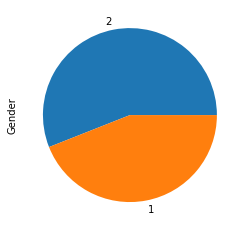

In [38]:
data.Gender.value_counts().plot(kind="pie")